<a href="https://colab.research.google.com/github/HannouniAdil/data_science/blob/main/IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/BBDS/Week 13 - Unsupervised Learning - Clustering Analysis/1 - Session 13.1 - K-Mean Clustering - (R & Python)/2 - Codes/2- K-Means Clustering  in Python'/
%cd 'MyDrive'
%cd BBDS/
%cd 'Week 13 - Unsupervised Learning - Clustering Analysis'/
%cd '1 - Session 13.1 - K-Mean Clustering - (R & Python)'/
%cd '2 - Codes'/ 
%cd '2- K-Means Clustering  in Python'/

Mounted at /content/drive
/content/drive/MyDrive/BBDS/Week 13 - Unsupervised Learning - Clustering Analysis/1 - Session 13.1 - K-Mean Clustering - (R & Python)/2 - Codes/2- K-Means Clustering  in Python
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/BBDS/Week 13 - Unsupervised Learning - Clustering Analysis/1 - Session 13.1 - K-Mean Clustering - (R & Python)/2 - Codes/2- K-Means Clustering  in Python
[Errno 2] No such file or directory: 'BBDS/'
/content/drive/MyDrive/BBDS/Week 13 - Unsupervised Learning - Clustering Analysis/1 - Session 13.1 - K-Mean Clustering - (R & Python)/2 - Codes/2- K-Means Clustering  in Python
[Errno 2] No such file or directory: 'Week 13 - Unsupervised Learning - Clustering Analysis/'
/content/drive/MyDrive/BBDS/Week 13 - Unsupervised Learning - Clustering Analysis/1 - Session 13.1 - K-Mean Clustering - (R & Python)/2 - Codes/2- K-Means Clustering  in Python
[Errno 2] No such file or directory: '1 - Session 13.1 - K-Mean Clustering - (R 

In [2]:
from ast import mod
from IPython.core.debugger import set_trace
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
  sys.path.append(module_path)

plt.style.use(style="seaborn")


In [3]:
df = pd.read_csv('./merged_transaction_data.csv')
df.columns

Index(['cc_number', 'date', 'transaction', 'long', 'lat', 'cc_limit',
       'user_id', 'zipcode', 'state'],
      dtype='object')

In [4]:
df.head(2)

,cc_number,date,transaction,long,lat,cc_limit,user_id,zipcode,state
0,8286184208673370,7/11/2016 0:32,43.78,-80.174132,40.267370,20000,8673379,15342,PA
1,8286184208673370,8/23/2016 22:23,103.15,-80.194240,40.180114,20000,8673379,15342,PA


# **Isolation Forest**
Isolation Forest is one of the most efficient algorithms for outliers detection especially dimension datasets. The model builds a Random Forest in which each Decision Tree is grown randomly. 

In [6]:
df['cc_number'].value_counts()

5031601510431300    667
3585502196772990    657
2389119600205840    653
4377569562956230    653
4983109900355490    636
                   ... 
8544352013572900      2
9709399321342260      2
6346428420140210      1
6324406419081960      1
8751020373538300      1
Name: cc_number, Length: 843, dtype: int64

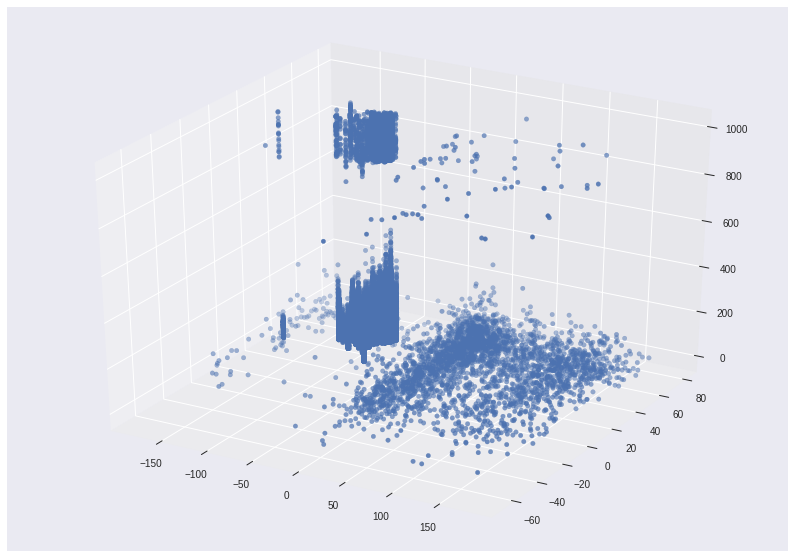

In [7]:
%matplotlib inline
plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')

fg = ax.scatter3D(df['long'], df['lat'], df['transaction'])

In [8]:
from sklearn.ensemble import IsolationForest
constamination = 0.01
data = df.copy()

In [9]:
for col in data.columns:
  if data[col].dtype =='object':
    le = LabelEncoder()
    data[col].fillna('None', inplace = True)
    le.fit(list(data[col].astype(str).values))
    data[col] = le.transform(list(data[col].astype(str).values))
  else:
    data[col].fillna(-999, inplace=True)

In [10]:
data.head(2)

,cc_number,date,transaction,long,lat,cc_limit,user_id,zipcode,state
0,8286184208673370,27453,43.78,-80.174132,40.267370,20000,8673379,15342,26
1,8286184208673370,60654,103.15,-80.194240,40.180114,20000,8673379,15342,26


In [11]:
%%time
model = IsolationForest(contamination=constamination, n_estimators=1000)
model.fit(data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


CPU times: user 1min 12s, sys: 243 ms, total: 1min 13s
Wall time: 1min 13s


IsolationForest(contamination=0.01, n_estimators=1000)

In [12]:
df['iforest'] = pd.Series(model.predict(data))
df['iforest'] = df['iforest'].map({1: 0, -1: 1})
print(df['iforest'].value_counts())

0    230712
1      2331
Name: iforest, dtype: int64


In [13]:
2331/230712

0.010103505669406012